In [16]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
from operator import itemgetter

Problem4Data = loadmat(r"/home/karanvora/Documents/New York University/Classes/Semester 1/Machine Learning/Assignments/Assignment 1/dataset4.mat")
X_Data = Problem4Data['X']
Y_Data = Problem4Data['Y']

In [17]:
Length, Degree = X_Data.shape
Length

200

In [22]:
HyperParams = {
    "StepSize" : 1,
    "Tolerance" : 0.00401
}

In [19]:
def Exponential(X):
    Exponential = 1.0 / (1 + np.exp(-X))
    return Exponential

In [20]:
# Weights = np.array([[2],[2],[2]])
# print(Weights)

Weights :  [[20.78827129]
 [12.90951386]
 [-8.79071776]]
Iterations :  2956
Minimum error :  0.015
Minimum risk :  0.10766697685030328


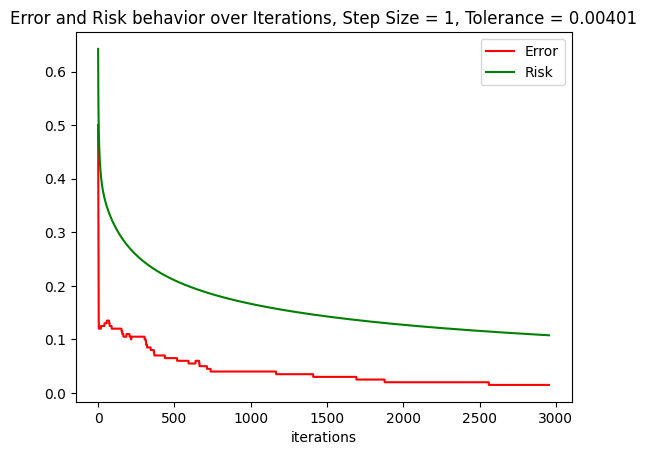

In [24]:
Errors = []
Risks = []
Iterations = 0
Prediction = 0
Weights = np.random.random_sample((Degree, 1))
while(True):

    Prediction = Exponential(np.dot(X_Data, Weights))
    Error = Y_Data - Prediction
    Descent = HyperParams['StepSize'] * 1 / len(X_Data) * np.dot(X_Data.T, Error)
    Weights = Weights + Descent
    Iterations += 1
    #print(Weights)
    
    Errors.append(np.count_nonzero((Prediction > 0.5) != Y_Data) / Length)
    EmpericalRisk = 0
    for val in range(len(Y_Data)):
        if(Y_Data[val][0] == 1):
            EmpericalRisk -= math.log(Prediction[val][0])
        else:
            EmpericalRisk -= math.log(1 - Prediction[val][0])

    Risks.append(EmpericalRisk / Length)

    if(np.linalg.norm(Descent) < HyperParams['Tolerance']):
        break
print("Weights : ", Weights)
print("Iterations : ", Iterations)

print("Minimum error : ", min(Errors))
print("Minimum risk : ", min(Risks))

plt.figure(1)
plt.plot(range(Iterations), Errors,'r-',label='Error')
plt.plot(range(Iterations), Risks, 'g-',label='Risk')
plt.xlabel('iterations')
plt.title('Error and Risk behavior over Iterations, Step Size = {}, Tolerance = {}'.format(HyperParams['StepSize'], HyperParams['Tolerance']))
plt.legend()
plt.show()